In [6]:
import pandas as pd
import supy as sp
from fig_functions.dict_legend import *
from fig_functions.night import *
from fig_functions.supy_plot import *

in_folder = 'data/'

sp.show_version()

SuPy version: 2023.7.3.dev0
-------------


In [7]:
s_rc = in_folder + 'sample_data/RunControl.nml'
t1_rc = in_folder + 't1/RunControl.nml'
t2_rc = in_folder + 't2/RunControl.nml'
t3_rc = in_folder + 't3/RunControl.nml'


df_state_init_s = sp.init_supy(s_rc)
df_state_init_t1 = sp.init_supy(t1_rc)
df_state_init_t2 = sp.init_supy(t2_rc)
df_state_init_t3 = sp.init_supy(t3_rc)


2023-08-24 15:32:59,932 - SuPy - INFO - All cache cleared.
2023-08-24 15:33:01,082 - SuPy - INFO - All cache cleared.
2023-08-24 15:33:02,276 - SuPy - INFO - All cache cleared.
2023-08-24 15:33:03,516 - SuPy - INFO - All cache cleared.


In [8]:
# Metdata 
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)
# 2012 one year to reduce time for test setup
df_forcing=df_forcing.loc['2012-06': '2012-07'].iloc[1:]


2023-08-24 15:33:05,729 - SuPy - INFO - All cache cleared.


In [4]:
df_output_s, df_state_final_s = sp.run_supy(df_forcing, df_state_init_s)


2023-08-24 15:28:48,707 - SuPy - INFO - ====================
2023-08-24 15:28:48,708 - SuPy - INFO - Simulation period:
2023-08-24 15:28:48,710 - SuPy - INFO -   Start: 2012-01-01 00:05:00
2023-08-24 15:28:48,711 - SuPy - INFO -   End: 2012-01-02 23:55:00
2023-08-24 15:28:48,712 - SuPy - INFO - 
2023-08-24 15:28:48,714 - SuPy - INFO - No. of grids: 1
2023-08-24 15:28:48,715 - SuPy - INFO - SuPy is running in serial mode
2023-08-24 15:28:49,204 - SuPy - INFO - Execution time: 0.5 s
2023-08-24 15:28:49,205 - SuPy - INFO - ====================



In [5]:
df_output_t1, df_state_final_t1 = sp.run_supy(df_forcing, df_state_init_t1)

2023-08-24 15:08:59,636 - SuPy - INFO - ====================
2023-08-24 15:08:59,638 - SuPy - INFO - Simulation period:
2023-08-24 15:08:59,638 - SuPy - INFO -   Start: 2012-01-01 00:05:00
2023-08-24 15:08:59,639 - SuPy - INFO -   End: 2012-03-31 23:55:00
2023-08-24 15:08:59,641 - SuPy - INFO - 
2023-08-24 15:08:59,642 - SuPy - INFO - No. of grids: 1
2023-08-24 15:08:59,644 - SuPy - INFO - SuPy is running in serial mode


In [9]:
df_output_t2, df_state_final_t2 = sp.run_supy(df_forcing, df_state_init_t2)
df_output_t3, df_state_final_t3 = sp.run_supy(df_forcing, df_state_init_t3) 

2023-08-24 15:33:26,391 - SuPy - INFO - ====================
2023-08-24 15:33:26,393 - SuPy - INFO - Simulation period:
2023-08-24 15:33:26,394 - SuPy - INFO -   Start: 2012-06-01 00:05:00
2023-08-24 15:33:26,395 - SuPy - INFO -   End: 2012-07-31 23:55:00
2023-08-24 15:33:26,397 - SuPy - INFO - 
2023-08-24 15:33:26,398 - SuPy - INFO - No. of grids: 1
2023-08-24 15:33:26,400 - SuPy - INFO - SuPy is running in serial mode
2023-08-24 16:04:41,861 - SuPy - INFO - Execution time: 1875.5 s
2023-08-24 16:04:41,862 - SuPy - INFO - ====================

2023-08-24 16:04:41,863 - SuPy - INFO - ====================
2023-08-24 16:04:41,863 - SuPy - INFO - Simulation period:
2023-08-24 16:04:41,864 - SuPy - INFO -   Start: 2012-06-01 00:05:00
2023-08-24 16:04:41,864 - SuPy - INFO -   End: 2012-07-31 23:55:00
2023-08-24 16:04:41,865 - SuPy - INFO - 
2023-08-24 16:04:41,866 - SuPy - INFO - No. of grids: 1
2023-08-24 16:04:41,866 - SuPy - INFO - SuPy is running in serial mode
2023-08-24 16:40:11,547 -

In [11]:
# df_forcing_merge_x = pd.concat([df_forcing_s, df_forcing_wu,df_forcing_w],axis=1,join='inner',keys=['fKC_sKC','fWS_sKC','fWS_sWS']).swaplevel(0,1,axis=1).sort_index(axis=1)

suffix_list = ['s','t1'] 

df_state_merge_x=pd.concat([df_state_init_t2, df_state_init_t3],axis=1,join='inner',keys= suffix_list).swaplevel(0,1,axis=1).sort_index(axis=1)

df_output_merge_x=df_output_merge_x=pd.concat([df_output_t2, df_output_t3],axis=1,join='inner', keys = suffix_list).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid]

df_merge_x=df_output_merge_x.SUEWS

# add available energy, AE
df_merge_x=df_merge_x.stack().eval('AE=QN+QF-QS').unstack()

# Plot

<Axes: xlabel='datetime'>

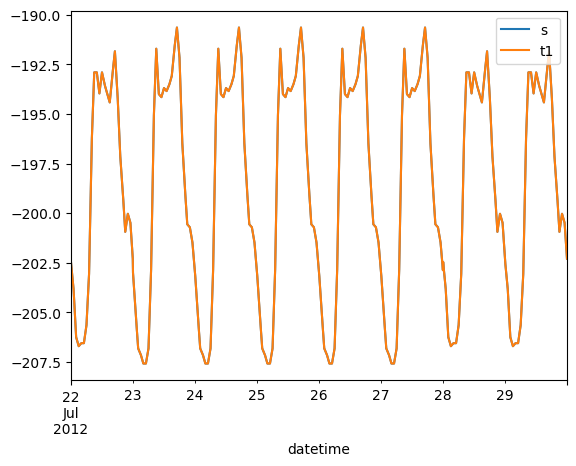

In [21]:
# Start and end date for comparison
s = '2012 07 22'
e = '2012 07 29'


df_merge_x.loc[s:e, 'AE'].plot()

KeyError: "['QN_w' 'QN_wu'] not in index"

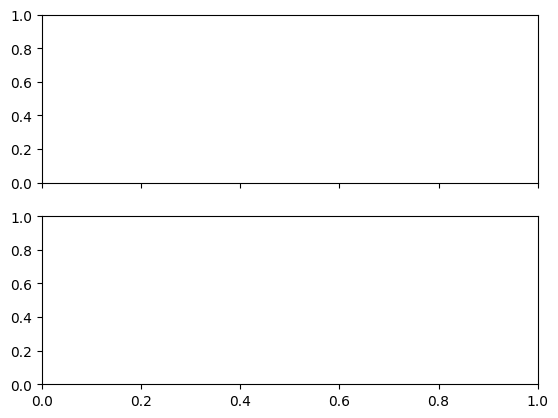

In [14]:
# %% Net All Wave Radiation
var = 'QN'
supy_plot(var, df_merge_x,s,e)

In [ ]:
# %% Storage Heat Flux
var = 'QS'
supy_plot(var, df_merge_x,s,e)


In [3]:
rc = in_folder + '2021a/RunControl.nml'

df_state_init = sp.init_supy(rc)
# Metdata 
grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(rc, grid)
# 2012 one year to reduce time for test setup
# df_forcing=df_forcing.loc['2012-01': '2012-03'].iloc[1:]


2023-08-24 14:34:19,661 - SuPy - INFO - All cache cleared.
2023-08-24 14:34:20,281 - SuPy - WARNING - multiple years are set for grids: Int64Index([1], dtype='int64', name='Grid'); SuPy will proceed with records of the first year of each grid
2023-08-24 14:34:20,704 - SuPy - INFO - All cache cleared.
2023-08-24 14:34:21,306 - SuPy - WARNING - multiple years are set for grids: Int64Index([1], dtype='int64', name='Grid'); SuPy will proceed with records of the first year of each grid


In [5]:
df_output_ss, df_state_final_ss = sp.run_supy(df_forcing, df_state_init)


2023-08-24 14:35:00,531 - SuPy - INFO - ====================
2023-08-24 14:35:00,532 - SuPy - INFO - Simulation period:
2023-08-24 14:35:00,533 - SuPy - INFO -   Start: 2005-01-01 00:05:00
2023-08-24 14:35:00,535 - SuPy - INFO -   End: 2005-01-06 00:00:00
2023-08-24 14:35:00,535 - SuPy - INFO - 
2023-08-24 14:35:00,537 - SuPy - INFO - No. of grids: 1
2023-08-24 14:35:00,539 - SuPy - INFO - SuPy is running in serial mode
2023-08-24 14:36:25,439 - SuPy - INFO - Execution time: 84.9 s
2023-08-24 14:36:25,441 - SuPy - INFO - ====================



In [9]:
tt = df_output_ss.loc[grid].SUEWS

<Axes: xlabel='datetime'>

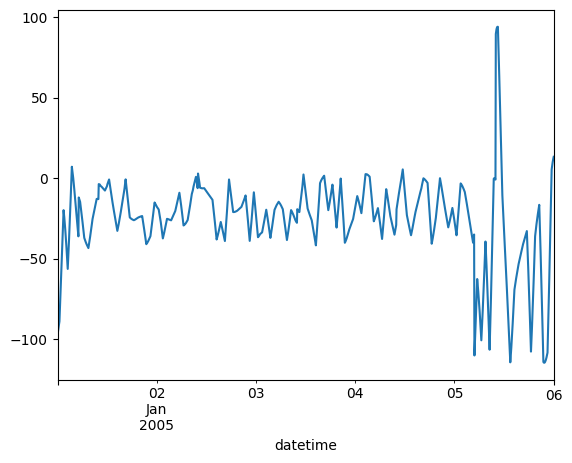

In [11]:
tt.loc[:,'QS'].plot()